In [681]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<font size = +2><b>Importing Data</b></font>

In [2]:
#read data
names=pd.read_csv('name_basics.tsv',sep='\t')
titles_akas=pd.read_csv('titles_akas.tsv',sep='\t')
titles_basic=pd.read_csv('titles_basic.tsv',sep='\t')
crew =pd.read_csv('crew.tsv',sep='\t')
episode =pd.read_csv('episode.tsv',sep='\t')
principals =pd.read_csv('principals.tsv',sep='\t')
ratings =pd.read_csv('ratings.tsv',sep='\t')

C:\Users\Localuser\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Localuser\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
len(crew)

8152534

In [7]:
len(titles_basic)

8152534

In [8]:
len(episode)

5970241

In [5]:
#explore datasets
names.head(1)
titles_akas.head(1)
titles_basic.head(1)
crew.head(1)
episode.head(1)
principals.head(1)
ratings.head(1)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"


In [7]:
titles_basic.nunique()

tconst            8152534
titleType              12
primaryTitle      3911658
originalTitle     3930133
isAdult                11
startYear             256
endYear                96
runtimeMinutes        849
genres               2289
dtype: int64

In [11]:
#check title types
titles_basic['titleType'].value_counts()

tvEpisode       5970424
short            824682
movie            584500
video            316933
tvSeries         212234
tvMovie          132417
tvMiniSeries      38734
tvSpecial         33642
videoGame         28773
tvShort           10193
radioSeries           1
radioEpisode          1
Name: titleType, dtype: int64

In [10]:
#retrieve only movies
movies_basic = titles_basic[titles_basic['titleType']=='movie']
len(movies_basic)

584500

In [94]:
names.head(1)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"


In [93]:
principals.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"


In [15]:
ratings.head(1)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1775


In [12]:
len(ratings)

1178282

In [14]:
ratings.nunique()

tconst           1178282
averageRating         91
numVotes           19169
dtype: int64

In [99]:
#external dataset - revenue (3000 observations)
revenue=pd.read_csv('train.csv')

In [100]:
revenue.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'], dtype='object')

In [102]:
len(revenue)

3000

In [101]:
revenue.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [107]:
rev_correl=pd.merge(revenue, df,how='left',left_on='imdb_id',right_on='tconst')

In [109]:
#given revenue is most often cited as a measure of success, explore correlation of revenue with numVotes and averageRating
rev_correl.corr()

,id,budget,popularity,runtime,revenue,averageRating,numVotes
id,1.000000,0.019732,-0.007470,0.010750,0.000610,-0.010277,-0.023677
budget,0.019732,1.000000,0.342356,0.238373,0.752965,0.004868,0.463700
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460,0.155829,0.447587
runtime,0.010750,0.238373,0.133690,1.000000,0.216380,0.352435,0.253157
revenue,0.000610,0.752965,0.461460,0.216380,1.000000,0.146873,0.628444
averageRating,-0.010277,0.004868,0.155829,0.352435,0.146873,1.000000,0.377801
numVotes,-0.023677,0.463700,0.447587,0.253157,0.628444,0.377801,1.000000


In [117]:
df['numVotes'].skew()

25.529141180048402

<font size = +2><b>Creation of Base Dataset</b></font>

In [11]:
#given that averageRating and numVotes are the only immediate continuous features, we do an inner join in the movies_basic to get movies with ratings
df=pd.merge(movies_basic, ratings)

In [31]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266867 entries, 0 to 266866
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          266867 non-null  object 
 1   titleType       266867 non-null  object 
 2   primaryTitle    266867 non-null  object 
 3   originalTitle   266867 non-null  object 
 4   isAdult         266867 non-null  object 
 5   startYear       266867 non-null  object 
 6   endYear         266867 non-null  object 
 7   runtimeMinutes  266867 non-null  object 
 8   genres          266867 non-null  object 
 9   averageRating   266867 non-null  float64
 10  numVotes        266867 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 24.4+ MB


<font size="5"><b>Preliminary Analytics</b></font>

In [32]:
#Get highest rated movie in 2018 (highest averageRating)
df[df['startYear']=='2018'].query('averageRating == averageRating.max()')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
173865,tt15063026,movie,The Outsiders,The Outsiders,0,2018,\N,60,Documentary,10.0,5
258297,tt8215820,movie,Are We Making a Film? Behind the Scenes: Follo...,Are We Making a Film? Behind the Scenes: Follo...,0,2018,\N,67,Documentary,10.0,7
259620,tt8438538,movie,Visconti's Eagles,Visconti's Eagles,0,2018,\N,53,Biography,10.0,5


In [33]:
#Get highest rated votes in 2018 (highest numVotes)
df[df['startYear']=='2018'].query('numVotes == numVotes.max()')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
223322,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",8.4,904079


In [18]:
#Remove rows with no value for runtimeMinutes
df_completerun=df[df['runtimeMinutes']!='\\N']

#Change runtimeMinutes into numeric while retaining original runtimeMinutes column for reference
df_completerun['runtimeClean']=pd.to_numeric(df_completerun['runtimeMinutes'])


C:\Users\Localuser\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [82]:
#Find title with longest runtime minutes
df_completerun.sort_values('runtimeClean',ascending = False).head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,runtimeClean
258618,tt8273150,movie,Logistics,Logistics,0,2012,\N,51420,Documentary,6.7,83,51420
220111,tt3854496,movie,Ambiancé,Ambiancé,0,2020,\N,43200,Documentary,5.3,56,43200
204912,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011,\N,14400,Documentary,6.5,82,14400
150619,tt10844900,movie,Qw,Qw,0,2019,\N,10062,Drama,7.8,28,10062
199340,tt2355497,movie,Beijing 2003,Beijing 2003,0,2004,\N,9000,Documentary,7.7,22,9000


<font size ="3"><b>Most Popular Actor</b></font>

In [4]:
#check names dataset
names.head(1)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"


In [84]:
names.nunique()

nconst               11129900
primaryName           8660810
birthYear                 504
deathYear                 443
primaryProfession       20453
knownForTitles        4597428
dtype: int64

In [574]:
#split known for titles
knownfortitles=names['knownForTitles'].str.split(',', expand=True)

In [575]:
#merge back with names
names2=pd.concat([names, knownfortitles], axis=1)

In [61]:
len(names2)

11129900

In [576]:
#renamecolumns
names2.columns=['nconst','primaryName','birthYear','deathYear','primaryProfession','knownforTitles','title1','title2','title3','title4','title5','title6','title7']

In [577]:
#select only names with primary profession
names3 = names2[names2['primaryProfession'].notnull()]

In [115]:
#check how many rows were left
len(names3)

8749955

In [578]:
#select only with actor in Primary Profession
actornames=names3[names3['primaryProfession'].str.contains("actor")]

In [579]:
#melt to be able to match movies with actors
actormelt=actornames.melt(id_vars=['nconst','primaryName','birthYear','deathYear','primaryProfession','knownforTitles']).sort_values(by=['nconst','variable'])

In [580]:
#select only actors who have entries in known for Titles
actormelt2 = actormelt[actormelt['value'].notnull()]

#we now have a dataframe containing actors and movies that they are known for

In [29]:
#select only movies in 2018
movies_2018=df_completerun[df_completerun['startYear']=='2018']

To approximate the popularity of an actor, we can explore the "principals" dataset.


In [161]:
#explore categories
principals['category'].unique()

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [567]:
#select only actors/actresses
principals_act=principals[(principals['category']=='actor') | (principals['category']=='actress')]

In [123]:
len(principals_act)

18320949

In [31]:
principals_act.head(3)

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N


In [568]:
#merge films in 2018 and principal cast
actor_films_2018=pd.merge(movies_2018, principals_act,how='inner',left_on='tconst',right_on='tconst')
#we know get films with their principal cast members (no names for now)

In [581]:
#merge the above df to retrieve the names of the cast members
actor_films_names_2018_2=pd.merge(actor_films_2018, actornames,how='inner',left_on=['nconst'],right_on=['nconst'])

<font size ="3"><b>Actor Share: A proxy of popularity</b></font>

In [ ]:
#To get a proy of popularity, one can look at numVotes. However, if two actors are part of the same movie, they would have the same 
#measure of popularity. To calibrate this, we can use the variable "ordering" found in the principals dataset. For each movie
#with multiple cast memberes, the ordering variable indicates an order in which the names are found. We are assuming
#that the earlier number (i.e. lower number) represent the more principal of the cast members found. Hence, we divide the 
#numVotes with the ordering number to get the proxy variable Actor Share.

In [583]:
actor_films_names_2018_2['actor_share']=actor_films_names_2018_2['numVotes']/actor_films_names_2018_2['ordering']

In [80]:
actor_films_names_2018_2.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,runtimeClean,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownforTitles,title1,title2,title3,title4,title5,title6,title7,actor_share
0,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,6.8,6729,122,1,nm0001379,actor,\N,"[""Jake Hannaford""]",John Huston,1906,1987,"actor,director,writer","tt0061452,tt0043265,tt0071315,tt0040897",tt0061452,tt0043265,tt0071315,tt0040897,None,None,None,6729.0


In [82]:
#for example, Michael B Jordan is the lead character in Creed II, therefore he get the whole numVotes value. However, in Black Panther, he only received an ordering value of 2, because he is the second lead to Chadwick Boseman who is Black Panther.
actor_films_names_2018_2[actor_films_names_2018_2['primaryName']=='Michael B. Jordan']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,runtimeClean,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownforTitles,title1,title2,title3,title4,title5,title6,title7,actor_share
32,tt0360556,movie,Fahrenheit 451,Fahrenheit 451,0,2018,\N,100,"Drama,Sci-Fi,Thriller",4.9,18577,100,1,nm0430107,actor,\N,"[""Guy Montag""]",Michael B. Jordan,1987,\N,"actor,producer,director","tt1825683,tt3076658,tt2334649,tt1502712",tt1825683,tt3076658,tt2334649,tt1502712,None,None,None,18577.0
33,tt1825683,movie,Black Panther,Black Panther,0,2018,\N,134,"Action,Adventure,Sci-Fi",7.3,664935,134,2,nm0430107,actor,\N,"[""Erik Killmonger""]",Michael B. Jordan,1987,\N,"actor,producer,director","tt1825683,tt3076658,tt2334649,tt1502712",tt1825683,tt3076658,tt2334649,tt1502712,None,None,None,332467.5
34,tt6343314,movie,Creed II,Creed II,0,2018,\N,130,"Drama,Sport",7.1,111842,130,1,nm0430107,actor,\N,"[""Adonis Johnson""]",Michael B. Jordan,1987,\N,"actor,producer,director","tt1825683,tt3076658,tt2334649,tt1502712",tt1825683,tt3076658,tt2334649,tt1502712,None,None,None,111842.0


In [615]:
top100=actor_films_names_2018_2.groupby('primaryName')['actor_share'].agg('sum').sort_values(ascending = False).reset_index().head(100) 

In [620]:
top100actorslist=top100['primaryName'].tolist()

In [81]:
actor_films_names_2018_2.groupby('primaryName')['actor_share'].agg('sum').sort_values(ascending = False).head(10) 

primaryName
Robert Downey Jr.    904079.0
Chadwick Boseman     664935.0
Chris Hemsworth      524142.5
Ryan Reynolds        508645.0
Rami Malek           478611.0
Michael B. Jordan    462886.5
Jason Momoa          438482.0
Viggo Mortensen      416597.0
Shameik Moore        414942.0
Tye Sheridan         392364.0
Name: actor_share, dtype: float64

In [45]:
actor_films_names_2018=pd.merge(actor_films_2018, actormelt2,how='inner',left_on=['nconst','tconst'],right_on=['nconst','value'])
actor_films_names_2018.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,runtimeClean,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownforTitles,variable,value
0,tt0137818,movie,Housesitter: The Night They Saved Siegfried's ...,Housesitter: The Night They Saved Siegfried's ...,0,2018,\N,95,\N,4.4,31,95,2,nm0309225,actor,\N,"[""Andy""]",Richard Gasparian,\N,\N,"animation_department,miscellaneous,actor","tt0096697,tt0137818,tt0462538,tt2235691",title2,tt0137818
1,tt0192528,movie,Heaven & Hell,Reverse Heaven,0,2018,\N,104,Drama,4.0,102,104,2,nm2341584,actor,\N,"[""Cop #2"",""Detective"",""Alien""]",David Carter,\N,\N,actor,"tt0192528,tt0839852",title1,tt0192528
2,tt0328810,movie,My Land,Aamaar Bhuvan,0,2018,\N,102,"Drama,Family",7.7,81,102,10,nm8801426,actor,\N,\N,Shibani Bhattachariya,\N,\N,actor,tt0328810,title1,tt0328810
3,tt0328810,movie,My Land,Aamaar Bhuvan,0,2018,\N,102,"Drama,Family",7.7,81,102,4,nm1384018,actor,\N,\N,Asit Basu,\N,\N,"actor,editor,editorial_department","tt0328810,tt1399196,tt0111067",title1,tt0328810
4,tt0328810,movie,My Land,Aamaar Bhuvan,0,2018,\N,102,"Drama,Family",7.7,81,102,9,nm5493905,actor,\N,\N,Asit Basu,\N,\N,actor,"tt1591068,tt0328810,tt2274394",title2,tt0328810


<font size = +2><b>Start of Database Creation 
    </b></font> 

In [4]:
#retrieve only movies
movies_basic = titles_basic[titles_basic['titleType']=='movie']
len(movies_basic)

584500

In [7]:
#given that averageRating and numVotes are the only immediate continuous features, we do an inner join in the movies_basic to get movies with ratings
df=pd.merge(movies_basic, ratings)
len(df)

266867

In [8]:
#remove missing values
df2=(df[df['startYear']!='\\N'])
df3=(df2[df2['runtimeMinutes']!='\\N'])

In [9]:
#change to numeric
df3['Year'] = pd.to_numeric(df3['startYear'])
df3['runtime']=pd.to_numeric(df3['runtimeMinutes'])

C:\Users\Localuser\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [10]:
#prepare for adjustment of year
df3['currentYear']=2022
df3['yearsonIMDB']=df3['currentYear']-df3['Year']

In [11]:
def my_recode(yearsonIMDB):
    if yearsonIMDB > 21:
        return 21
    else:
        return yearsonIMDB

In [12]:
df3['adjustedYears'] = df3['yearsonIMDB'].apply(my_recode)

In [13]:
#estimatedVotesperYear may reduce bias towards older films which may 
#continuously accrue votes over time
df3['estimatedVotesperYear']=df3['numVotes']/df3['adjustedYears']

In [ ]:
# df2 = pd.merge(df,principalsno1,how='left',on='tconst')
# df2.head(1)
# df3 = pd.merge(df2,names,how='left',on='nconst')
df4=(df3[df3['startYear']!='\\N'])
df5=(df4[df4['runtimeMinutes']!='\\N'])

<font size="5"><b>Trends</b></font>

In [336]:
df6=df5[df5['Year']>=2015]

In [407]:
df6_full=df5[df5['Year']>=2011]

In [408]:
#separate append genres to titles
genres_sep=df6_full['genres'].str.split(',', expand=True)
df7_full=pd.concat([df6_full, genres_sep], axis=1)

In [409]:
df7_full.rename(columns = {0: "genre1"}, inplace=True)
df7_full.rename(columns = {1: "genre2"}, inplace=True)
df7_full.rename(columns = {2: "genre3"}, inplace=True)

In [339]:
genres_sep=df6['genres'].str.split(',', expand=True)
df7=pd.concat([df6, genres_sep], axis=1)

In [410]:
len(df7_full)

82825

In [337]:
len(df6)

52664

In [348]:
df7['Year'].value_counts()

2017    9065
2018    8999
2019    8754
2016    8684
2015    8354
2020    6252
2021    2556
Name: Year, dtype: int64

In [362]:
df7.rename(columns = {0: "genre1"}, inplace=True)
df7.rename(columns = {1: "genre2"}, inplace=True)
df7.rename(columns = {2: "genre3"}, inplace=True)

In [382]:
#get first genre
df7.groupby(['genre1']).size().sort_values(ascending=False).head(10)

genre1
Drama          13404
Documentary    10977
Comedy          9548
Action          4935
Horror          3166
Biography       2084
Crime           1944
Adventure       1798
Thriller        1241
Animation        762
dtype: int64

In [411]:
df7_full['genre1'].value_counts().head(10)

Drama          20908
Documentary    16671
Comedy         15601
Action          7742
Horror          4923
Biography       3861
Adventure       3012
Crime           2987
Thriller        1750
Animation       1158
Name: genre1, dtype: int64

<AxesSubplot:ylabel='genre1'>

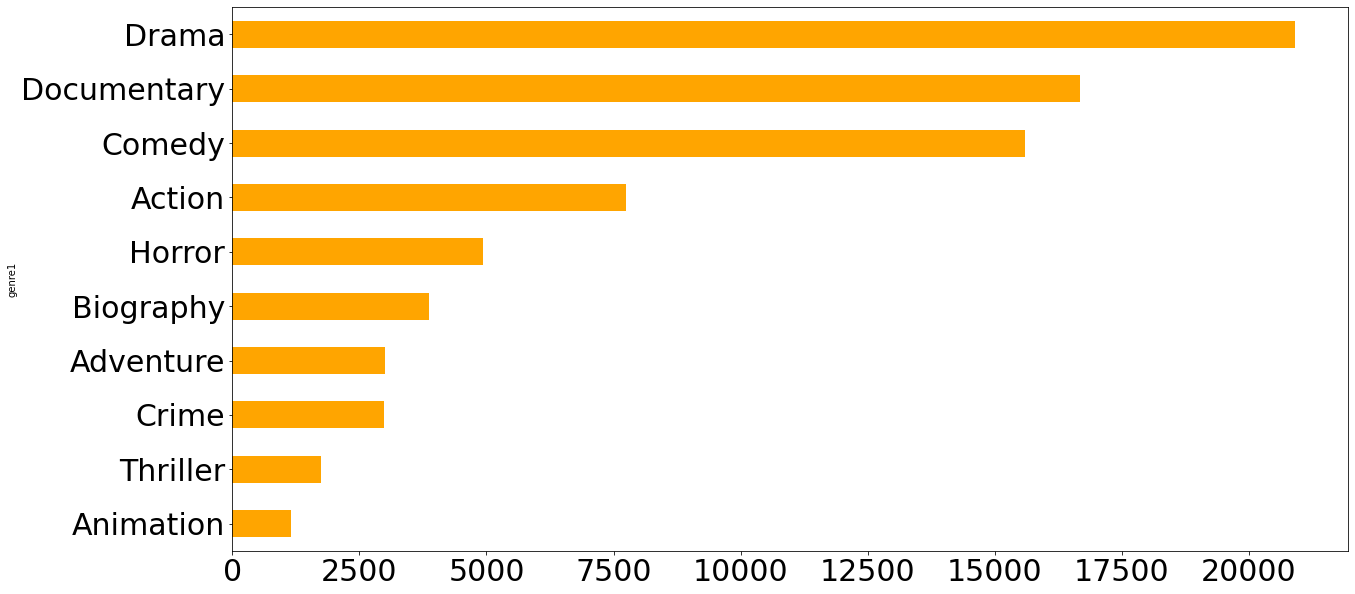

In [412]:
df7_full.groupby(['genre1']).size().sort_values(ascending=True).tail(10).plot.barh(color='orange',figsize=(20,10),fontsize=30)

In [375]:
df7['genre1'].value_counts().head(10)

Drama          13404
Documentary    10977
Comedy          9548
Action          4935
Horror          3166
Biography       2084
Crime           1944
Adventure       1798
Thriller        1241
Animation        762
Name: genre1, dtype: int64

<AxesSubplot:ylabel='genre1'>

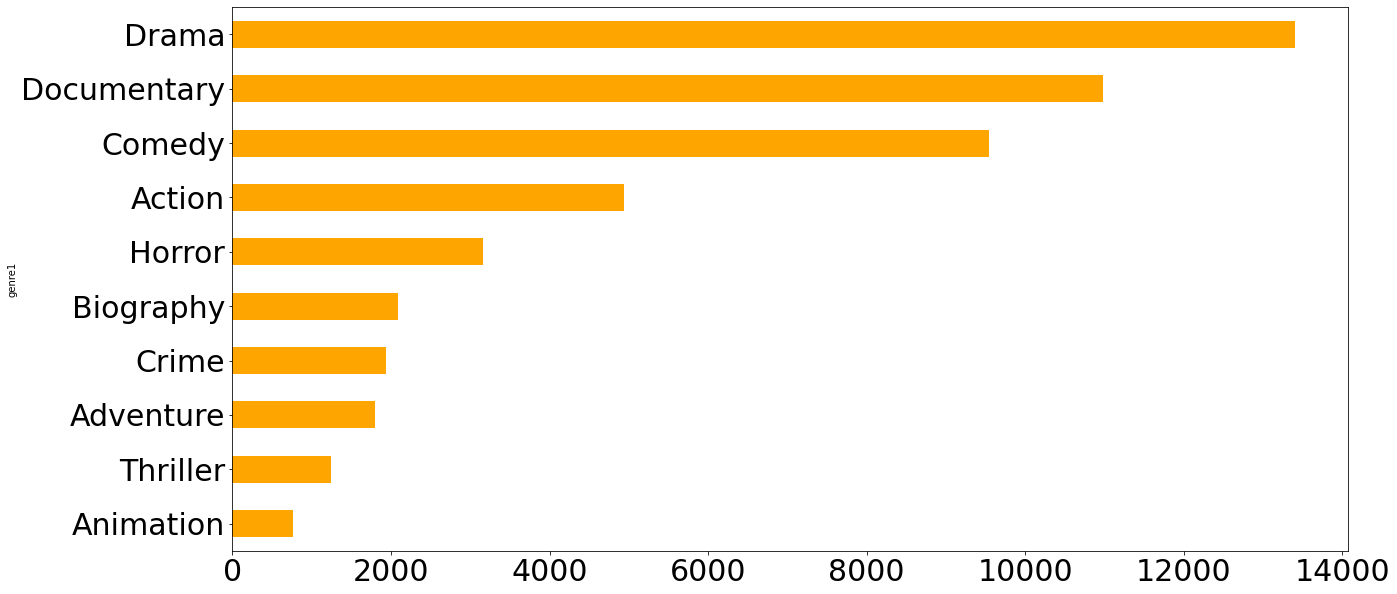

In [399]:
df7.groupby(['genre1']).size().sort_values(ascending=True).tail(10).plot.barh(color='orange',figsize=(20,10),fontsize=30)

In [351]:
df7[0].unique()

array(['Drama', 'Horror', 'Comedy', 'Documentary', 'Adventure', '\\N',
       'Action', 'Sci-Fi', 'Biography', 'Crime', 'Romance', 'Family',
       'Music', 'Musical', 'Mystery', 'Thriller', 'Western', 'Fantasy',
       'Animation', 'History', 'Sport', 'War', 'Adult', 'News',
       'Reality-TV', 'Talk-Show'], dtype=object)

In [352]:
len(df7[ge].unique())

26

In [350]:
df7.pivot_table(index='Year', columns=0, aggfunc=len)

tconst                                                                                                                                                                                                       titleType                                                                                                                                                                                                       primaryTitle                                                                                                                                                                                                       originalTitle                                                                                                                                                                                                       isAdult                                                                                                                                                     \
0    Action Adult Adventure Animation Biography  Comedy  Crime Documentary   Drama Family Fantasy History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Sport Talk-Show Thriller  War Western    \N    Action Adult Adventure Animation Biography  Comedy  Crime Documentary   Drama Family Fantasy History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Sport Talk-Show Thriller  War Western    \N       Action Adult Adventure Animation Biography  Comedy  Crime Documentary   Drama Family Fantasy History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Sport Talk-Show Thriller  War Western    \N        Action Adult Adventure Animation Biography  Comedy  Crime Documentary   Drama Family Fantasy History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Sport Talk-Show Thriller  War Western    \N  Action Adult Adventure Animation Biography  Comedy  Crime Documentary   Drama Family Fantasy History Horror Music Musical Mystery News Reality-TV Romance   
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2015  792.0  11.0     318.0     115.0     494.0  1562.0  324.0      1629.0  2105.0   72.0    39.0    14.0  457.0  21.0    17.0    47.0  NaN        1.0    86.0   32.0   8.0       NaN    142.0  5.0    10.0  53.0     792.0  11.0     318.0     115.0     494.0  1562.0  324.0      1629.0  2105.0   72.0    39.0    14.0  457.0  21.0    17.0    47.0  NaN        1.0    86.0   32.0   8.0       NaN    142.0  5.0    10.0  53.0        792.0  11.0     318.0     115.0     494.0  1562.0  324.0      1629.0  2105.0   72.0    39.0    14.0  457.0  21.0    17.0    47.0  NaN        1.0    86.0   32.0   8.0       NaN    142.0  5.0    10.0  53.0         792.0  11.0     318.0     115.0     494.0  1562.0  324.0      1629.0  2105.0   72.0    39.0    14.0  457.0  21.0    17.0    47.0  NaN        1.0    86.0   32.0   8.0       NaN    142.0  5.0    10.0  53.0   792.0  11.0     318.0     115.0     494.0  1562.0  324.0      1629.0  2105.0   72.0    39.0    14.0  457.0  21.0    17.0    47.0  NaN        1.0    86.0   
2016  879

In [413]:
df7_full.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Year,runtime,currentYear,yearsonIMDB,averageVotesperYear,adjustedYears,adjustedVotesperYear,genre1,genre2,genre3
1205,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,6.9,26,1.0,nm0290157,actress,\N,"[""Soledad""]",Ève Francis,1886,1980,"actress,assistant_director,writer","tt0781376,tt0013122,tt0012134,tt0231622",2019,67,2021,2,13.000000,2,13.000000,Drama,None,None
2623,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical",5.6,17,1.0,nm0022209,actor,\N,"[""Don Casto Tordesillas""]",José López Alonso,\N,\N,actor,tt0016906,2014,80,2021,7,2.428571,7,2.428571,Comedy,Musical,None
3721,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,Action,6.2,66,1.0,nm0266662,actress,\N,"[""Gu Yun""]",Xuepeng Fan,\N,\N,actress,"tt0355037,tt0019996,tt5348132,tt0340399",2011,94,2021,10,6.600000,10,6.600000,Action,None,None


In [423]:
count_plot=pd.crosstab(df7_full['Year'], df7_full['genre1']).reset_index()
count_plot.columns

Index(['Year', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\N'], dtype='object', name='genre1')

In [430]:
countplot2=count_plot[['Year','Drama','Documentary','Comedy','Action','Horror']]

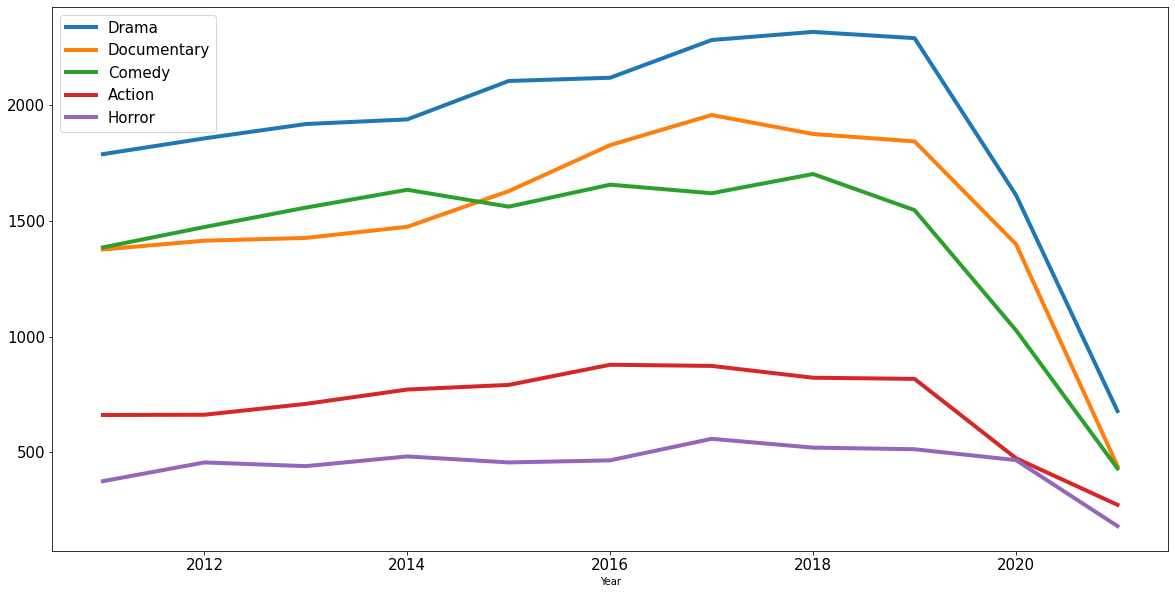

In [431]:
ax=countplot2.plot(x="Year", style='-',figsize=(20,10),fontsize=15,lw=4)
ax.legend(loc=2, prop={'size': 15})
ax.locator_params(integer=True)

In [439]:
df7_full.pivot_table(index='Year', columns='genre1', values='averageRating', aggfunc='mean', fill_value=0).reset_index()

genre1,Year,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,\N
0,2011,5.710574,5.014286,6.235294,6.023301,7.206304,5.885498,6.048485,7.196732,6.203354,6.117778,5.834211,0.0,6.028571,4.684043,7.443750,6.660000,6.010000,5.2,0.0,5.538889,5.135714,7.066667,0.00,5.547525,6.500000,4.350000,6.448684
1,2012,5.735445,6.100000,6.345489,6.132955,7.187467,5.900475,6.014859,7.176537,6.260258,5.915789,5.888636,0.0,6.875000,4.778337,7.432353,5.608333,6.185000,0.0,0.0,5.796226,5.016129,6.922222,0.00,5.376923,6.416667,4.714286,6.368852
2,2013,5.648592,4.757143,6.346512,6.265657,7.124842,5.960205,6.140959,7.172950,6.224231,5.900000,5.476316,8.9,6.133333,4.665306,8.059091,6.518182,5.627027,6.0,0.0,5.945763,5.293333,6.600000,0.00,5.307971,0.000000,4.280000,6.294030
3,2014,5.756736,5.500000,6.421203,6.262264,7.215744,5.896514,6.182877,7.221085,6.229190,5.800000,5.166667,0.0,6.350000,4.701449,7.476000,6.575000,5.763636,0.0,0.0,5.925000,5.217143,6.627273,0.00,5.518301,2.600000,4.966667,6.233846
4,2015,5.642929,5.045455,6.305660,6.215652,7.159312,5.910243,6.091049,7.255064,6.198860,5.597222,5.451282,0.0,6.807143,4.531291,7.204762,6.241176,5.710638,0.0,7.7,5.966279,5.290625,5.112500,0.00,5.396479,5.880000,5.310000,6.113208
5,2016,5.674858,6.228571,6.226471,6.234545,7.085750,5.846892,6.056657,7.242724,6.213639,5.701961,5.384615,0.0,6.263636,4.541845,7.918182,7.325000,5.932558,0.0,8.2,5.868293,5.245833,6.875000,0.00,5.370064,7.150000,5.390909,6.551515
6,2017,5.715904,5.800000,6.091541,6.288095,6.953561,5.862531,5.861078,7.203524,6.292901,6.078205,5.258333,0.0,6.673333,4.561896,7.018750,7.052941,5.938776,0.0,7.4,5.998864,4.942000,7.037500,0.00,5.283333,5.733333,3.833333,6.415385
7,2018,5.604496,6.500000,6.144291,5.957576,6.858033,5.711333,5.941447,7.198241,6.186534,5.834328,5.564407,0.0,6.288235,4.566219,7.100000,6.636842,5.435937,0.0,8.4,5.942991,5.078723,7.362500,0.00,5.300881,5.744444,5.484615,6.539062
8,2019,5.702200,5.100000,5.970652,5.335556,6.918855,5.798513,5.914769,7.176139,6.197860,6.016667,5.218750,0.0,6.673333,4.526848,7.586667,6.356522,5.519231,7.8,2.7,6.337079,5.256098,6.378571,8.40,5.226106,4.600000,5.466667,5.916071
9,2020,5.585684,6.040000,5.983663,6.309278,6.811696,5.799319,5.947549,7.190929,6.228908,6.043636,5.701818,0.0,6.990909,4.610921,7.582609,6.536842,5.447222,0.0,6.7,6.415584,4.681818,6.744444,7.70,5.296447,4.220000,4.423077,6.704444


In [444]:
numvotesplot=df7_full.pivot_table(index='Year', columns='genre1', values='numVotes', aggfunc='mean', fill_value=0).reset_index()

In [449]:
numvotesplot2=numvotesplot[['Year','Drama','Documentary','Action','Comedy','Horror']]

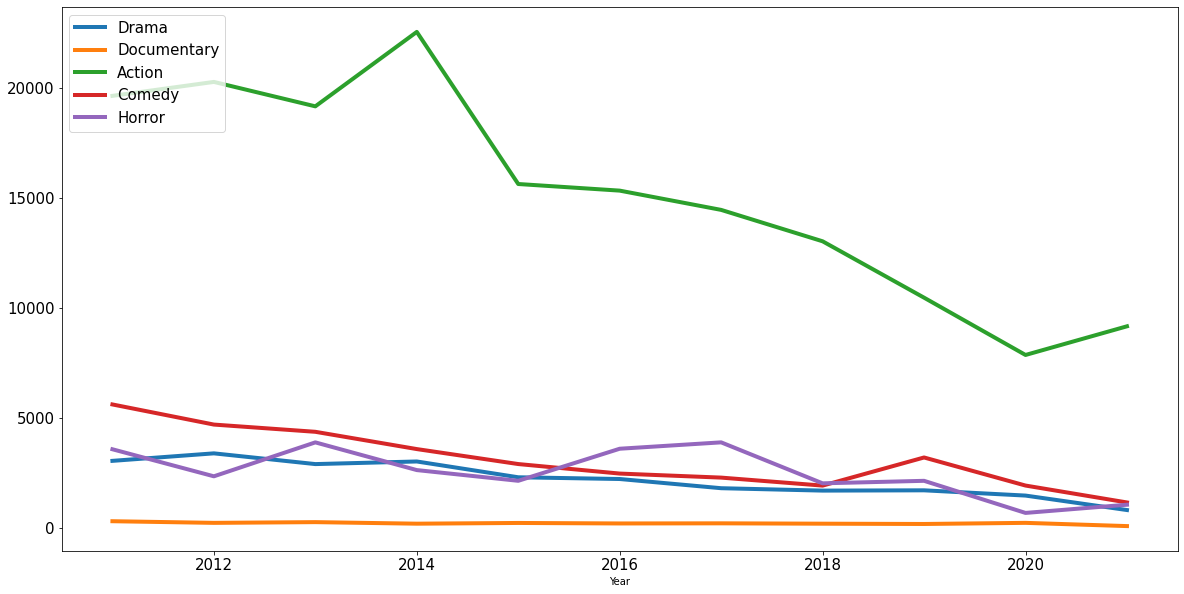

In [450]:
ax=numvotesplot2.plot(x="Year", style='-',figsize=(20,10),fontsize=15,lw=4)
ax.legend(loc=2, prop={'size': 15})
ax.locator_params(integer=True)

In [471]:
df7_full.loc[(df7_full['genre1']=='Action') & (df7_full['startYear']=='2014')].sort_values('numVotes', ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Year,runtime,currentYear,yearsonIMDB,averageVotesperYear,adjustedYears,adjustedVotesperYear,genre1,genre2,genre3
190204,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,1079766,1.0,nm0695435,actor,\N,"[""Peter Quill""]",Chris Pratt,1979,\N,"actor,soundtrack,producer","tt0369610,tt1266020,tt2015381,tt1490017",2014,121,2021,7,154252.285714,7,154252.285714,Action,Adventure,Comedy
185728,tt1843866,movie,Captain America: The Winter Soldier,Captain America: The Winter Soldier,0,2014,\N,136,"Action,Adventure,Sci-Fi",7.7,767627,1.0,nm0262635,actor,\N,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981,\N,"actor,producer,soundtrack","tt0458339,tt3498820,tt0848228,tt1843866",2014,136,2021,7,109661.000000,7,109661.000000,Action,Adventure,Sci-Fi
186887,tt1877832,movie,X-Men: Days of Future Past,X-Men: Days of Future Past,0,2014,\N,132,"Action,Adventure,Sci-Fi",7.9,674978,1.0,nm0001772,actor,\N,"[""Professor X""]",Patrick Stewart,1940,\N,"actor,producer,director","tt0120844,tt3315342,tt0120903,tt0117731",2014,132,2021,7,96425.428571,7,96425.428571,Action,Adventure,Sci-Fi
178627,tt1631867,movie,Edge of Tomorrow,Edge of Tomorrow,0,2014,\N,113,"Action,Adventure,Sci-Fi",7.9,623502,1.0,nm0000129,actor,\N,"[""Cage""]",Tom Cruise,1962,\N,"actor,producer,soundtrack","tt0325710,tt0116695,tt0181689,tt0092099",2014,113,2021,7,89071.714286,7,89071.714286,Action,Adventure,Sci-Fi
206530,tt2802144,movie,Kingsman: The Secret Service,Kingsman: The Secret Service,0,2014,\N,129,"Action,Adventure,Comedy",7.7,609841,1.0,nm0000147,actor,\N,"[""Harry Hart"",""Galahad""]",Colin Firth,1960,\N,"actor,producer,soundtrack","tt2802144,tt1315981,tt0243155,tt1504320",2014,129,2021,7,87120.142857,7,87120.142857,Action,Adventure,Comedy
207636,tt2911666,movie,John Wick,John Wick,0,2014,\N,101,"Action,Crime,Thriller",7.4,568010,1.0,nm0000206,actor,\N,"[""John Wick""]",Keanu Reeves,1964,\N,"actor,producer,soundtrack","tt0111257,tt0102685,tt0234215,tt0133093",2014,101,2021,7,81144.285714,7,81144.285714,Action,Crime,Thriller
207247,tt2872732,movie,Lucy,Lucy,0,2014,\N,89,"Action,Sci-Fi,Thriller",6.4,462320,1.0,nm0424060,actress,\N,"[""Lucy""]",Scarlett Johansson,1984,\N,"actress,soundtrack,producer","tt0848228,tt0335266,tt0162346,tt1798709",2014,89,2021,7,66045.714286,7,66045.714286,Action,Sci-Fi,Thriller
194553,tt2179136,movie,American Sniper,American Sniper,0,2014,\N,133,"Action,Biography,Drama",7.3,453161,1.0,nm0177896,actor,\N,"[""Chris Kyle""]",Bradley Cooper,1975,\N,"actor,producer,soundtrack","tt2179136,tt1517451,tt1800241,tt1045658",2014,133,2021,7,64737.285714,7,64737.285714,Action,Biography,Drama
205454,tt2713180,movie,Fury,Fury,0,2014,\N,134,"Action,Drama,War",7.6,444487,1.0,nm0000093,actor,\N,"[""Don 'Wardaddy' Collier""]",Brad Pitt,1963,\N,"actor,producer,soundtrack","tt1210166,tt0356910,tt0114746,tt2935510",2014,134,2021,7,63498.142857,7,63498.142857,Action,Drama,War
185596,tt1840309,movie,Divergent,Divergent,0,2014,\N,139,"Action,Adventure,Mystery",6.6,436025,1.0,nm0940362,actress,\N,"[""Tris""]",Shailene Woodley,1991,\N,"actress,producer,soundtrack","tt2582846,tt1840309,tt1033575,tt2908446",2014,139,2021,7,62289.285714,7,62289.285714,Action,Adventure,Mystery


In [324]:
time=df5[df5['Year']>=2015].groupby(["Year"]).size().reset_index()

In [325]:
time

,Year,0
0,2015,8354
1,2016,8684
2,2017,9065
3,2018,8999
4,2019,8754
5,2020,6252
6,2021,2556


In [338]:
df6.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Year,runtime,currentYear,yearsonIMDB,averageVotesperYear,adjustedYears,adjustedVotesperYear
1205,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,6.9,26,1.0,nm0290157,actress,\N,"[""Soledad""]",Ève Francis,1886,1980,"actress,assistant_director,writer","tt0781376,tt0013122,tt0012134,tt0231622",2019,67,2021,2,13.0,2,13.0


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Movie Counts')]

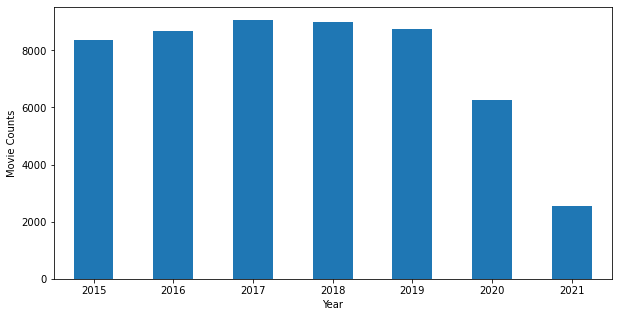

In [334]:
ax=time.plot.bar(x="Year", style='-',figsize=(10,5),fontsize=10,lw=2,rot=0,legend=False)
ax.set(xlabel="Year", ylabel="Movie Counts")

In [ ]:
ax=numvotesplot.plot(x="Year", style='-',figsize=(20,10),fontsize=15,lw=3)
ax.legend(loc=2, prop={'size': 15})
ax.locator_params(integer=True)
ax.set_ylim([0, 25000])

In [306]:
df5[df5['Year']>=2010].value_counts()

tconst     titleType  primaryTitle                                                                originalTitle                                                               isAdult  startYear  endYear  runtimeMinutes  genres                   averageRating  numVotes  ordering  nconst     category  job                   characters         primaryName           birthYear  deathYear  primaryProfession                  knownForTitles                            Year  runtime  currentYear  yearsonIMDB  averageVotesperYear  adjustedYears  adjustedVotesperYear
tt0011216  movie      Spanish Fiesta                                                              La fête espagnole                                                           0        2019       \N       67              Drama                    6.9            26        1.0       nm0290157  actress   \N                    ["Soledad"]        Ève Francis           1886       1980       actress,assistant_director,writer  tt0781376,tt0013122,

<font size = +3><b>A Metric for Hit Movies - Creation of the Hit Label</b></font>

In [122]:
names.nunique()

nconst               11129900
primaryName           8660810
birthYear                 504
deathYear                 443
primaryProfession       20453
knownForTitles        4597428
dtype: int64

In [121]:
df.nunique()

tconst            266867
titleType              1
primaryTitle      238461
originalTitle     245698
isAdult                4
startYear            216
endYear                1
runtimeMinutes       396
genres              1266
averageRating         91
numVotes           16418
dtype: int64

In [14]:
#explore the two prominent numeric features
df_features=df[['averageRating','numVotes']]

In [43]:
df3.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Cluster_Labels,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,12,1,1905,100,2021,116,21,0.571429


In [17]:
df_features2=df3[['averageRating','estimatedVotesperYear']]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df_features2)

In [19]:
#K-Means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

model = KMeans(n_clusters=3, random_state = 36)
model.fit(df_scaled2)
cluster_labels = model.predict(df_scaled2)

print(pd.Series(cluster_labels).value_counts())

0    144233
1     94820
2       548
dtype: int64


In [65]:
df_features2['Cluster_Labels'] = cluster_labels

C:\Users\Localuser\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [84]:
df_features2.groupby("Cluster_Labels")["averageRating"].median().to_frame().reset_index()

,Cluster_Labels,averageRating
0,0,6.9
1,1,5.1
2,2,7.4


In [83]:
df_features2.groupby("Cluster_Labels")["estimatedVotesperYear"].median().to_frame().reset_index()

,Cluster_Labels,estimatedVotesperYear
0,0,5.00000
1,1,6.20000
2,2,50289.02381


In [87]:
df_features2.groupby("Cluster_Labels")["estimatedVotesperYear"].quantile([0.25,0.5,0.75]).to_frame().reset_index()

,Cluster_Labels,level_1,estimatedVotesperYear
0,0,0.25,1.428571
1,0,0.50,5.000000
2,0,0.75,31.333333
3,1,0.25,1.476190
4,1,0.50,6.200000
5,1,0.75,29.750000
6,2,0.25,38009.153846
7,2,0.50,50289.023810
8,2,0.75,72698.208333


In [88]:
df_features2.groupby("Cluster_Labels")["averageRating"].quantile([0.25,0.5,0.75]).to_frame().reset_index()

,Cluster_Labels,level_1,averageRating
0,0,0.25,6.4
1,0,0.50,6.9
2,0,0.75,7.4
3,1,0.25,4.4
4,1,0.50,5.1
5,1,0.75,5.6
6,2,0.25,6.8
7,2,0.50,7.4
8,2,0.75,8.0


In [ ]:
df.time_diff.quantile([0.25,0.5,0.75])

In [20]:
df3['Cluster_Labels'] = cluster_labels

C:\Users\Localuser\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [72]:
df3[df3['Cluster_Labels']=2].sort_values('averageRating')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Cluster_Labels,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear
256238,tt7886848,movie,Sadak 2,Sadak 2,0,2020,\N,133,"Action,Drama",1.1,69940,2,2020,133,2022,2,2,34970.000000
150944,tt10888594,movie,Radhe,Radhe,0,2021,\N,135,"Action,Crime,Thriller",1.8,165629,2,2021,135,2022,1,1,165629.000000
198461,tt2322441,movie,Fifty Shades of Grey,Fifty Shades of Grey,0,2015,\N,125,"Drama,Romance,Thriller",4.1,304620,2,2015,125,2022,7,7,43517.142857
145545,tt10121392,movie,Thunder Force,Thunder Force,0,2021,\N,106,"Action,Adventure,Comedy",4.4,35698,2,2021,106,2022,1,1,35698.000000
216325,tt3554046,movie,Space Jam: A New Legacy,Space Jam: A New Legacy,0,2021,\N,115,"Adventure,Animation,Comedy",4.4,41333,2,2021,115,2022,1,1,41333.000000
235857,tt5433138,movie,F9: The Fast Saga,F9,0,2021,\N,143,"Action,Adventure,Crime",5.3,58585,2,2021,143,2022,1,1,58585.000000
239698,tt5814060,movie,The Nun,The Nun,0,2018,\N,96,"Horror,Mystery,Thriller",5.3,127638,2,2018,96,2022,4,4,31909.500000
228592,tt4682266,movie,The New Mutants,The New Mutants,0,2020,\N,94,"Action,Horror,Mystery",5.3,62810,2,2020,94,2022,2,2,31405.000000
248581,tt6802400,movie,Coming 2 America,Coming 2 America,0,2021,\N,110,Comedy,5.3,60201,2,2021,110,2022,1,1,60201.000000
199132,tt2345759,movie,The Mummy,The Mummy,0,2017,\N,111,"Action,Adventure,Fantasy",5.4,177691,2,2017,111,2022,5,5,35538.200000


In [91]:
len(df3[(df3['averageRating']>=6.8) & (df3['estimatedVotesperYear']>=38009)].sort_values(by=['estimatedVotesperYear'],ascending=True))

51

In [100]:
hitfilms=(df3[(df3['averageRating']>=8) & (df3['estimatedVotesperYear']>=72698)].sort_values(by=['estimatedVotesperYear'],ascending=True))

In [101]:
hitfilms.groupby('Year').size().tail(3)

Year
2019    5
2020    1
2021    1
dtype: int64

In [46]:
df3['hit_label'] = np.where((df3['averageRating']>=6.8) & (df3['estimatedVotesperYear']>=38009), 1, 0)

C:\Users\Localuser\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [23]:
df3[df3['hit_label']=='hit']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label
36067,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1684423,1972,175,2022,50,21,80210.619048,2,hit
37973,tt0071562,movie,The Godfather: Part II,The Godfather: Part II,0,1974,\N,202,"Crime,Drama",9.0,1169394,1974,202,2022,48,21,55685.428571,2,hit
39177,tt0073486,movie,One Flew Over the Cuckoo's Nest,One Flew Over the Cuckoo's Nest,0,1975,\N,133,Drama,8.7,945093,1975,133,2022,47,21,45004.428571,2,hit
41211,tt0076759,movie,Star Wars: Episode IV - A New Hope,Star Wars,0,1977,\N,121,"Action,Adventure,Fantasy",8.6,1265530,1977,121,2022,45,21,60263.333333,2,hit
42340,tt0078748,movie,Alien,Alien,0,1979,\N,117,"Horror,Sci-Fi",8.4,814186,1979,117,2022,43,21,38770.761905,2,hit
43561,tt0080684,movie,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,0,1980,\N,124,"Action,Adventure,Fantasy",8.7,1193443,1980,124,2022,42,21,56830.619048,2,hit
44083,tt0081505,movie,The Shining,The Shining,0,1980,\N,146,"Drama,Horror",8.4,931055,1980,146,2022,42,21,44335.952381,2,hit
45001,tt0082971,movie,Indiana Jones and the Raiders of the Lost Ark,Raiders of the Lost Ark,0,1981,\N,115,"Action,Adventure",8.4,909129,1981,115,2022,41,21,43291.857143,2,hit
46923,tt0086190,movie,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,0,1983,\N,131,"Action,Adventure,Fantasy",8.3,977556,1983,131,2022,39,21,46550.285714,2,hit
48129,tt0088247,movie,The Terminator,The Terminator,0,1984,\N,107,"Action,Sci-Fi",8.0,815558,1984,107,2022,38,21,38836.095238,2,hit


<font size = +3> <b> Feature Engineering </b> </font>

In [175]:
genres_sep=df3['genres'].str.split(',', expand=True)
df3=pd.concat([df3, genres_sep], axis=1)

In [177]:
df3.rename(columns = {0: "genre1"}, inplace=True)
df3.rename(columns = {1: "genre2"}, inplace=True)
df3.rename(columns = {2: "genre3"}, inplace=True)

In [178]:
df3.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label,genre1,genre2,genre3
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,12,1905,100,2022,117,21,0.571429,1,0,\N,None,None


In [338]:
df3[df3['Cluster_Labels']==2].sort_values('numVotes',ascending=False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label,genre1,genre2,genre3,firstgenre
60785,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2433177,1994,142,2022,28,21,115865.571429,2,1,Drama,None,None,Drama
134017,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2389153,2008,152,2022,14,14,170653.785714,2,1,Action,Crime,Drama,Action
167968,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2144322,2010,148,2022,12,12,178693.500000,2,1,Action,Adventure,Sci-Fi,Action
70635,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1919042,1999,139,2022,23,21,91382.952381,2,1,Drama,None,None,Drama
60637,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1887865,1994,154,2022,28,21,89898.333333,2,1,Crime,Drama,None,Crime
60054,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1880935,1994,142,2022,28,21,89568.333333,2,1,Drama,Romance,None,Drama
69385,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1733193,1999,136,2022,23,21,82533.000000,2,1,Action,Sci-Fi,None,Action
65473,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1713874,2001,178,2022,21,21,81613.047619,2,1,Action,Adventure,Drama,Action
77819,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1692654,2003,201,2022,19,19,89087.052632,2,1,Action,Adventure,Drama,Action
36067,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1684423,1972,175,2022,50,21,80210.619048,2,1,Crime,Drama,None,Crime


In [719]:
df3[df3['Cluster_Labels']==2].groupby('firstgenre')['estimatedVotesperYear'].mean().sort_values(ascending=False).head(10)

firstgenre
Action       65932.595378
Crime        62069.251570
Mystery      61592.588023
Horror       61523.857596
Adventure    59165.330012
Comedy       58107.487980
Drama        57643.729887
Family       56931.000000
Biography    56094.819586
Sci-Fi       49075.636364
Name: estimatedVotesperYear, dtype: float64

In [182]:
df3['firstgenre']=df3['genre1']

In [183]:
df3.loc[df3['genre1'] == '\\N', 'firstgenre'] = "No available genre"

In [720]:
#Top5AvgVotes Feature
Top5AvgVotes =['Action', 'Crime', 'Mystery', 'Horror','Adventure']

def matcher(x):
    for i in Top5AvgVotes:
        if i.lower() in x.lower():
            return 1
    else:
        return 0

In [721]:
df3['firstgenre']=df3['genre1']

In [722]:
df3['top5genre'] = df3['firstgenre'].apply(matcher)

In [346]:
df3.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label,genre1,genre2,genre3,firstgenre,top5genre
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,12,1905,100,2022,117,21,0.571429,1,0,\N,None,None,No available genre,0
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,671,1906,70,2022,116,21,31.952381,0,0,Action,Adventure,Biography,Action,1
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,13,1907,90,2022,115,21,0.619048,1,0,Drama,None,None,Drama,0


In [389]:
principals.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"


In [390]:
df4=df3

In [391]:
principalsno1=principals[principals['ordering']==1]

In [ ]:
rev_correl=pd.merge(revenue, df,how='left',left_on='imdb_id',right_on='tconst')

In [393]:
names_princip1=pd.merge(principalsno1,names,how='left',on='nconst')

In [399]:
names_princip1.head(1)

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,1,nm1588970,self,\N,"[""Self""]",Carmencita,1868,1910,soundtrack,"tt0000001,tt0057728"


In [398]:
df4.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label,genre1,genre2,genre3,firstgenre,top5genre
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,12,1905,100,2022,117,21,0.571429,1,0,\N,None,None,No available genre,0


In [723]:
df4=pd.merge(df3,names_princip1,how='left',left_on='tconst',right_on='tconst')


In [401]:
df4.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Year,runtime,currentYear,yearsonIMDB,adjustedYears,estimatedVotesperYear,Cluster_Labels,hit_label,genre1,genre2,genre3,firstgenre,top5genre,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,12,1905,100,2022,117,21,0.571429,1,0,\N,None,None,No available genre,0,1.0,nm0215752,actor,\N,\N,Antonio del Pozo,\N,\N,actor,tt0000502


In [417]:
#Top10Actors Feature
Top10Actors =['Robert Downey Jr.', 'Chadwick Boseman', 'Chris Hemsworth', 'Ryan Reynolds','Rami Malek','Michael B. Jordan', 'Jason Momoa', 'Viggo Mortensen', 'Shameik Moore','Tye Sheridan']

def matcher_actor(x):
    for i in Top10Actors:
        if i in x:
            return 1
    else:
        return 0

In [421]:
Top10Actors =['Robert Downey Jr.', 'Chadwick Boseman', 'Chris Hemsworth', 'Ryan Reynolds','Rami Malek','Michael B. Jordan', 'Jason Momoa', 'Viggo Mortensen', 'Shameik Moore','Tye Sheridan']

In [724]:
df4['Top10Actors']=df4['primaryName'].isin(Top10Actors)

In [427]:
df4['Top10Actors'].value_counts()

False    239498
True        103
Name: Top10Actors, dtype: int64

In [725]:
df4['Top10Actors'] = df4['Top10Actors'].astype(int)

In [452]:
#sequels
sequels=pd.read_csv('moviescleaned.csv')

In [726]:
df5=pd.merge(df4,sequels,how='left',left_on='tconst',right_on='tconst')

In [727]:
df5['isSequel'].value_counts()

1.0    485
0.0    364
Name: isSequel, dtype: int64

In [728]:
df5['isSequel'] = df5['isSequel'].fillna(0)

In [729]:
df5['isSequel'].value_counts()

0.0    239126
1.0       485
Name: isSequel, dtype: int64

In [730]:
df5['Top100Actors']=df5['primaryName'].isin(top100actorslist)

In [731]:
df5['Top100Actors'] = df5['Top100Actors'].astype(int)

In [732]:
df5['isAdult'] = df5['isAdult'].astype(int)

In [733]:
pd.crosstab(df5['Top100Actors'],df5['hit_label'])

hit_label,0,1
Top100Actors,,
0,238178,240
1,1101,92


In [559]:
pd.crosstab(modeldata['hit_label'], modeldata['top5genre'])

top5genre,0,1
hit_label,,
0,142000,97279
1,88,244


In [563]:
pd.crosstab(modeldata['hit_label'], modeldata['Top10Actors'])

Top10Actors,0,1
hit_label,,
0,239197,82
1,311,21


In [562]:
pd.crosstab(modeldata['hit_label'], modeldata['isSequel'])

isSequel,0.0,1.0
hit_label,,
0,238850,429
1,276,56


In [680]:
df5.to_csv('forviz.csv')

<font size = +2> <b> Model Pre-Processing </b> </font>

In [734]:
#selection of features
modeldata=df5[['runtime','hit_label','Year_x','top5genre','isAdult','Top10Actors','averageRating','isSequel','Top100Actors']]
modeldata

,runtime,hit_label,Year_x,top5genre,isAdult,Top10Actors,averageRating,isSequel,Top100Actors
0,100,0,1905,0,0,0,4.5,0.0,0
1,70,0,1906,1,0,0,6.1,0.0,0
2,90,0,1907,0,0,0,5.2,0.0,0
3,120,0,1908,1,0,0,5.3,0.0,0
4,58,0,1910,1,0,0,3.4,0.0,0
...,...,...,...,...,...,...,...,...,...
239606,51,0,2019,0,0,0,7.2,0.0,0
239607,90,0,2020,1,0,0,3.5,0.0,0
239608,84,0,2020,0,0,0,5.8,0.0,0
239609,92,0,2020,1,0,0,6.3,0.0,0


In [735]:
modeldata['hit_label'].value_counts()

0    239279
1       332
Name: hit_label, dtype: int64

In [736]:
train=modeldata[modeldata['Year_x']!=2020]
test=modeldata[modeldata['Year_x']==2020]

In [737]:
train=train.drop(columns=['Year_x'])
test=test.drop(columns=['Year_x'])

<font size = +2> <b> Pipeline </b> </font>

In [315]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [698]:
X = train.loc[:, train.columns != 'hit_label']
y = train.loc[:, train.columns == 'hit_label']
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [699]:
X_2020 = test.loc[:, test.columns != 'hit_label']
y_2020 = test.loc[:, test.columns == 'hit_label']

<font size = +2> <b> Logistic Regression </b> </font>

In [352]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [700]:
# categorical_features = ['firstgenre']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# preprocessor = ColumnTransformer(
#     transformers=[('cat', categorical_transformer, categorical_features)])

scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model1.fit(X_train, y_train)

C:\Users\Localuser\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [701]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[174770     13]
 [   211     25]]
Training AUC: 93.9614 %
Training accuracy: 99.8720 %


In [702]:
y_test_hat = model1.predict(X_2020)
y_test_hat_probs = model1.predict_proba(X_2020)[:,1]

test_accuracy = accuracy_score(y_2020, y_test_hat)*100
test_auc_roc = roc_auc_score(y_2020, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_2020, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[6236    0]
 [  16    0]]
Testing AUC: 84.8275 %
Testing accuracy: 99.7441 %


In [448]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.998698  1.000000  0.999348     59819
           1   1.000000  0.048780  0.093023        82

    accuracy                       0.998698     59901
   macro avg   0.999349  0.524390  0.546186     59901
weighted avg   0.998700  0.998698  0.998108     59901



<font size = +2><b>Decision Tree</b></font>

In [533]:
#load libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [534]:
X = train.loc[:, train.columns != 'hit_label']
y = train.loc[:, train.columns == 'hit_label']
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [703]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [704]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[174783      0]
 [   135    101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174783
           1       1.00      0.43      0.60       236

    accuracy                           1.00    175019
   macro avg       1.00      0.71      0.80    175019
weighted avg       1.00      1.00      1.00    175019



In [706]:
y_pred = classifier.predict(X_2020)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_2020, y_pred))
print(classification_report(y_2020, y_pred))

[[6234    2]
 [  16    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6236
           1       0.00      0.00      0.00        16

    accuracy                           1.00      6252
   macro avg       0.50      0.50      0.50      6252
weighted avg       0.99      1.00      1.00      6252



<font size = +2> <b> Logistic Regression and Decision Tree with Oversampling Techniques </b> </font>

In [28]:
import imblearn

In [117]:
#conda install -c glemaitre imbalanced-learn


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done



Examining @/win-64::__cuda==11.0=0: 100%|##########| 5/5 [00:00<00:00,  7.28it/s]
                                                                                 

Examining conflict for python imbalanced-learn:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                                     

UnsatisfiableError: The following specifications were found



Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


to be incompatible with the existing python installation in your environment:

Specifications:

  - imbalanced-learn -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [33]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [119]:
#!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [738]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['hit_label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-hits in oversampled data",len(os_data_y[os_data_y['hit_label']==0]))
print("Number of hits",len(os_data_y[os_data_y['hit_label']==1]))
print("Proportion of non-hits in oversampled data is ",len(os_data_y[os_data_y['hit_label']==0])/len(os_data_X))
print("Proportion of hits in oversampled data is ",len(os_data_y[os_data_y['hit_label']==1])/len(os_data_X))

length of oversampled data is  326262
Number of non-hits in oversampled data 163131
Number of hits 163131
Proportion of non-hits in oversampled data is  0.5
Proportion of hits in oversampled data is  0.5


In [739]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.593367
         Iterations: 35


C:\Users\Localuser\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.144      
Dependent Variable: hit_label        AIC:              387200.1878
Date:               2021-08-14 05:24 BIC:              387275.0560
No. Observations:   326262           Log-Likelihood:   -1.9359e+05
Df Model:           6                LL-Null:          -2.2615e+05
Df Residuals:       326255           LLR p-value:      0.0000     
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
------------------------------------------------------------------
runtime         0.0020   0.0001  14.0454 0.0000    0.0017   0.0022
top5genre       0.0344   0.0076   4.5450 0.0000    0.0196   0.0493
isAdult       -17.8563 157.9207  -0.1131 0.9100 -327.3751 291.6626
Top10Actors    -0.890

In [740]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(os_data_X, np.ravel(os_data_y))

LogisticRegression()

In [741]:
y_test_hat = logreg.predict(X_2020)
y_test_hat_probs = logreg.predict_proba(X_2020)[:,1]

test_accuracy = accuracy_score(y_2020, y_test_hat)*100
test_auc_roc = roc_auc_score(y_2020, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_2020, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[5103 1133]
 [   5   11]]
Testing AUC: 87.0445 %
Testing accuracy: 81.7978 %


In [93]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, y)
X_train_res.shape,y_train_res.shape

((466066, 1), (466066, 1))

In [136]:
y_train_res['hit_label']=y
X_train_res['runtime']=X

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test_hat = model1.predict(X_2020)
y_test_hat_probs = model1.predict_proba(X_2020)[:,1]

test_accuracy = accuracy_score(y_2020, y_test_hat)*100
test_auc_roc = roc_auc_score(y_2020, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_2020, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

In [96]:
print("length of oversampled data is ",len(X_train_res))
print("Number of non-hits in oversampled data",len(y_train_res[y_train_res['hit_label']==0]))
print("Number of hits",len(y_train_res[y_train_res['hit_label']==1]))
print("Proportion of non-hits in oversampled data is ",len(y_train_res[y_train_res['hit_label']==0])/len(X_train_res))
print("Proportion of hits in oversampled data is ",len(y_train_res[y_train_res['hit_label']==1])/len(X_train_res))

length of oversampled data is  466066
Number of non-hits in oversampled data 233033
Number of hits 233033
Proportion of non-hits in oversampled data is  0.5
Proportion of hits in oversampled data is  0.5


In [742]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(os_data_X, np.ravel(os_data_y))

DecisionTreeClassifier()

In [743]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[162880    251]
 [    99    121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    163131
           1       0.33      0.55      0.41       220

    accuracy                           1.00    163351
   macro avg       0.66      0.77      0.70    163351
weighted avg       1.00      1.00      1.00    163351



In [717]:
y_pred = classifier.predict(X_2020)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_2020, y_pred))
print(classification_report(y_2020, y_pred))

[[6221   15]
 [  15    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6236
           1       0.06      0.06      0.06        16

    accuracy                           1.00      6252
   macro avg       0.53      0.53      0.53      6252
weighted avg       1.00      1.00      1.00      6252

